In [42]:
#FILE NAME: Lab_2
#PROGRAMMER: VG6
#DATE: 14.03.2020
#Purpose: To learn channels convertion

# importing modules
%matplotlib inline
import numpy as np
from skimage.io import imread, imsave, imshow
from skimage import img_as_float, img_as_ubyte

# Encoding to YUV format functuion
# Arguments:
#   - Image wanted to convert
#       img : np.array
# Returns:
#   - Image in YUV format
#       img
def encode_rgb(img : np.array) -> np.array:
    # converting colors to 0..1 range
    img_f = img_as_float(img)
    
    # making a copy of our image
    img_copy = img_f.copy()

    # converting rgb colors to yuv
    img_copy[:, :, 0] = img_f[:, :, 0] * 0.2126 + img_f[:, :, 1] * 0.7152 + img_f[:, :, 2] * 0.0722
    img_copy[:, :, 1] = - img_f[:, :, 0] * 0.0999 - img_f[:, :, 1] * 0.3360 + img_f[:, :, 2] * 0.4360
    img_copy[:, :, 2] = img_f[:, :, 0] * 0.6150 - img_f[:, :, 1] * 0.5586 - img_f[:, :, 2] * 0.0563
    
    # initializing amout of pixels we want to drop
    k = round(img_copy[:, :, 0].size * 0.05)

    # sorting image
    sorted_img = sorted(img_copy[:, :, 0].ravel())

    # getting min and max value
    min_b = sorted_img[k + 1]
    max_b = sorted_img[-(k+1)]

    # evaluating new correlated image
    img_correlated_y = (img_copy[:, :, 0] - min_b) / (max_b - min_b)
    
    # clipping values from 0 to 1
    img_correlated_y = np.clip(img_correlated_y, 0, 1)
    img_copy[:, :, 0] = img_correlated_y
    
    img_copy = img_as_ubyte(img_copy)
    
    return img_copy

# Decoding from yuv to rgb function
# Arguments:
#   - Image wanted to convert
#       img : np.array
# Returns:
#   - Image in RGB format
#       img
def decode_yuv(img : np.array) -> np.array:
    # conveting image to 0..1
    img_copy = img_as_float(img)
    
    # making copy of image
    img_rgb = img_copy.copy()
    
    # converting image to rgb
    img_rgb[:, :, 0] = img_copy[:, :, 0] + 1.2803 * img_copy[:, :, 2]
    img_rgb[:, :, 1] = img_copy[:, :, 0] - 0.2148 * img_copy[:, :, 1]  - 0.3805 * img_copy[:, :, 2]
    img_rgb[:, :, 2] = img_copy[:, :, 0] + 2.1279 * img_copy[:, :, 1]
    
    # clipping values from 0 to 1
    img_rgb = np.clip(img_rgb, 0, 1)
    
    # converting image back to 0..255
    img_rgb = img_as_ubyte(img_rgb)
    
    return img_rgb

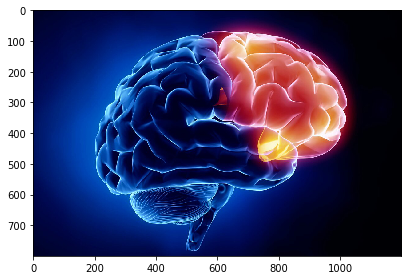

In [43]:
# read image in img variable
img = imread('https://avatars.mds.yandex.net/get-pdb/1686358/74613a5a-ec92-46a0-a8d1-976116f8065d/s1200')

# showing image
imshow(img)

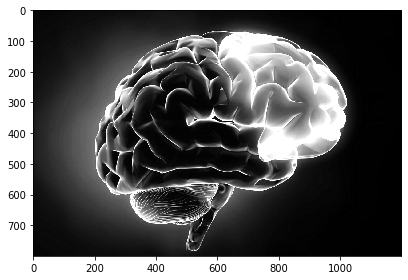

In [44]:
# encoding image
encoded_image = encode_rgb(img)

# showing image
imshow(encoded_image[:, :, 0])

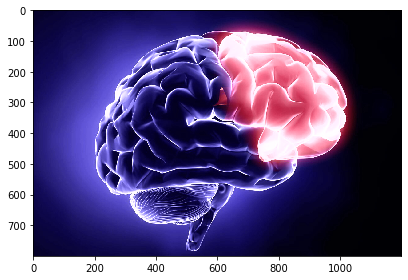

In [45]:
# decoding image
decoded_img = decode_yuv(encoded_image)

# showing image
imshow(decoded_img)